In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout

import warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
real_data = pd.read_csv('data/true.csv')
fake_data = pd.read_csv('data/fake.csv')

In [4]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
real_data['target'] = 1
fake_data['target'] = 0

In [7]:
real_data.tail()

,title,text,subject,date,target
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [8]:
fake_data.tail()

,title,text,subject,date,target
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [9]:
data = pd.concat([real_data, fake_data], ignore_index=True, sort=False)
data.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [10]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

# Visualization

1.Count of Fake and Real Data

target
0    23481
1    21417
Name: count, dtype: int64


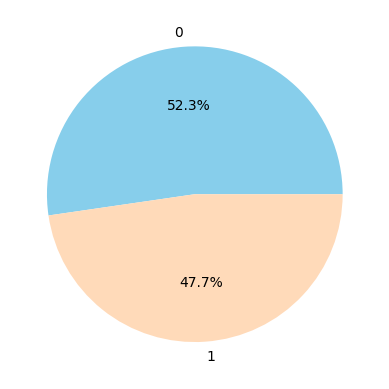

In [11]:
print(data["target"].value_counts())
g2 = plt.pie(data["target"].value_counts().values,explode=[0,0],labels=data.target.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])


Distribution of The Subject According to Real and Fake Data

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

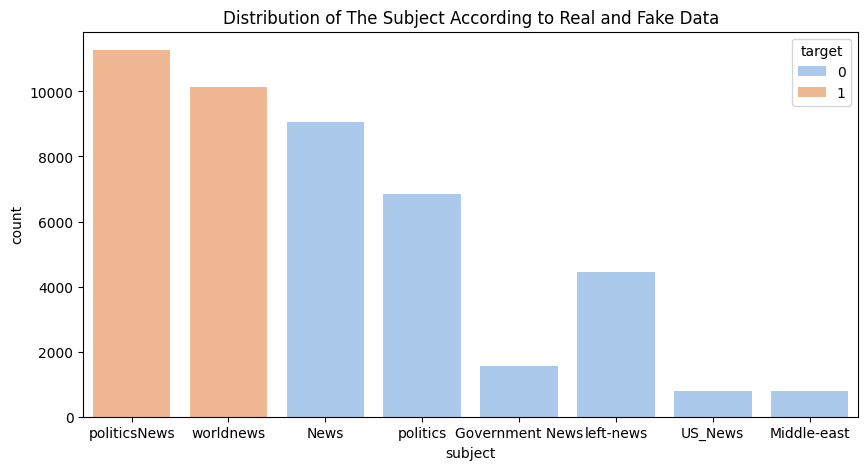

In [12]:
print(data.subject.value_counts())
plt.figure(figsize=(10, 5))

ax = sns.countplot(x="subject",  hue='target', data=data, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

# Data Cleaning

In [13]:
data['text']= data['subject'] + " " + data['title'] + " " + data['text']
del data['title']
del data['subject']
del data['date']
data.head()

,text,target
0,"politicsNews As U.S. budget fight looms, Repub...",1
1,politicsNews U.S. military to accept transgend...,1
2,politicsNews Senior U.S. Republican senator: '...,1
3,politicsNews FBI Russia probe helped by Austra...,1
4,politicsNews Trump wants Postal Service to cha...,1


In [14]:
first_text = data.text[10]
first_text

'politicsNews Jones certified U.S. Senate winner despite Moore challenge (Reuters) - Alabama officials on Thursday certified Democrat Doug Jones the winner of the state’s U.S. Senate race, after a state judge denied a challenge by Republican Roy Moore, whose campaign was derailed by accusations of sexual misconduct with teenage girls. Jones won the vacant seat by about 22,000 votes, or 1.6 percentage points, election officials said. That made him the first Democrat in a quarter of a century to win a Senate seat in Alabama.  The seat was previously held by Republican Jeff Sessions, who was tapped by U.S. President Donald Trump as attorney general. A state canvassing board composed of Alabama Secretary of State John Merrill, Governor Kay Ivey and Attorney General Steve Marshall certified the election results. Seating Jones will narrow the Republican majority in the Senate to 51 of 100 seats. In a statement, Jones called his victory “a new chapter” and pledged to work with both parties. M

Removal of HTML Contents

In [15]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [16]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(first_text, "html.parser")
first_text = soup.get_text()
first_text

'politicsNews Jones certified U.S. Senate winner despite Moore challenge (Reuters) - Alabama officials on Thursday certified Democrat Doug Jones the winner of the state’s U.S. Senate race, after a state judge denied a challenge by Republican Roy Moore, whose campaign was derailed by accusations of sexual misconduct with teenage girls. Jones won the vacant seat by about 22,000 votes, or 1.6 percentage points, election officials said. That made him the first Democrat in a quarter of a century to win a Senate seat in Alabama.  The seat was previously held by Republican Jeff Sessions, who was tapped by U.S. President Donald Trump as attorney general. A state canvassing board composed of Alabama Secretary of State John Merrill, Governor Kay Ivey and Attorney General Steve Marshall certified the election results. Seating Jones will narrow the Republican majority in the Senate to 51 of 100 seats. In a statement, Jones called his victory “a new chapter” and pledged to work with both parties. M

In [17]:
first_text = re.sub('\[[^]]*\]', ' ', first_text)
first_text = re.sub('[^a-zA-Z]',' ',first_text)  # replaces non-alphabets with spaces
first_text = first_text.lower() # Converting from uppercase to lowercase
first_text

'politicsnews jones certified u s  senate winner despite moore challenge  reuters    alabama officials on thursday certified democrat doug jones the winner of the state s u s  senate race  after a state judge denied a challenge by republican roy moore  whose campaign was derailed by accusations of sexual misconduct with teenage girls  jones won the vacant seat by about        votes  or     percentage points  election officials said  that made him the first democrat in a quarter of a century to win a senate seat in alabama   the seat was previously held by republican jeff sessions  who was tapped by u s  president donald trump as attorney general  a state canvassing board composed of alabama secretary of state john merrill  governor kay ivey and attorney general steve marshall certified the election results  seating jones will narrow the republican majority in the senate to    of     seats  in a statement  jones called his victory  a new chapter  and pledged to work with both parties  m

Removal of Stopwords

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\sri vasavi
[nltk_data]     chandu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
nltk.download("stopwords")
from nltk.corpus import stopwords

# we can use tokenizer instead of split
first_text = nltk.word_tokenize(first_text)

[nltk_data] Downloading package stopwords to C:\Users\sri vasavi
[nltk_data]     chandu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
first_text = [ word for word in first_text if not word in set(stopwords.words("english"))]

# Lemmatization

Lemmatization to bring back multiple forms of same word to their common root like 'coming', 'comes' into 'come'.

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\sri vasavi
[nltk_data]     chandu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
lemma = nltk.WordNetLemmatizer()
first_text = [ lemma.lemmatize(word) for word in first_text]

first_text = " ".join(first_text)
first_text

'politicsnews jones certified u senate winner despite moore challenge reuters alabama official thursday certified democrat doug jones winner state u senate race state judge denied challenge republican roy moore whose campaign derailed accusation sexual misconduct teenage girl jones vacant seat vote percentage point election official said made first democrat quarter century win senate seat alabama seat previously held republican jeff session tapped u president donald trump attorney general state canvassing board composed alabama secretary state john merrill governor kay ivey attorney general steve marshall certified election result seating jones narrow republican majority senate seat statement jones called victory new chapter pledged work party moore declined concede defeat even trump urged stood claim fraudulent election statement released certification said regret medium outlet reported alabama judge denied moore request block certification result dec election decision shortly canvass

## Perform it for all the examples

We performed the steps for a single example. Now let's perform it for all the examples in the data

In [23]:
#Removal of HTML Contents
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [24]:

#Removal of Punctuation Marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

In [25]:

# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)

In [26]:
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)

In [27]:
#Removal of stopwords
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)

    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word)
            final_text.append(word)
    return " ".join(final_text)

In [28]:


#Total function
def cleaning(text):
    text = remove_html(text)
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = remove_stopwords_and_lemmatization(text)
    return text

#Apply function on text column
data['text']=data['text'].apply(cleaning)

In [29]:
data.to_csv('clean_news.csv')

In [30]:
data.head()

,text,target
0,politicsnews u budget fight loom republican fl...,1
1,politicsnews u military accept transgender rec...,1
2,politicsnews senior u republican senator let m...,1
3,politicsnews fbi russia probe helped australia...,1
4,politicsnews trump want postal service charge ...,1


# Let's make some visualization with new data.

1.WordCloud for Real News

In [31]:
pip install wordcloud

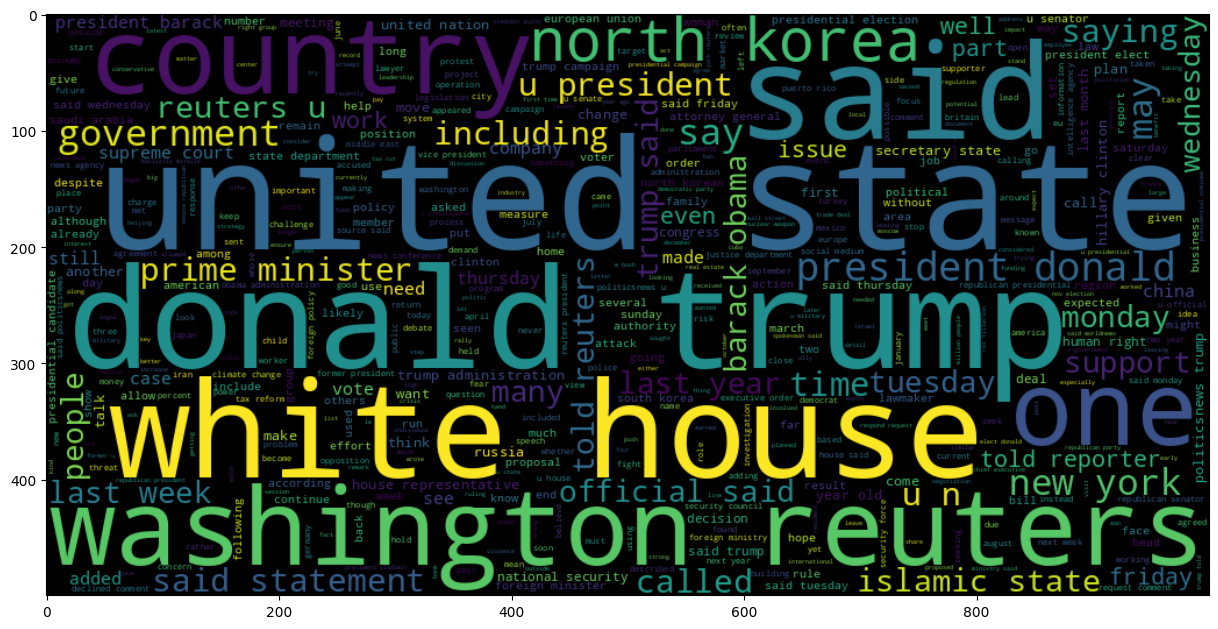

In [32]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

2.WordCloud for Fake News

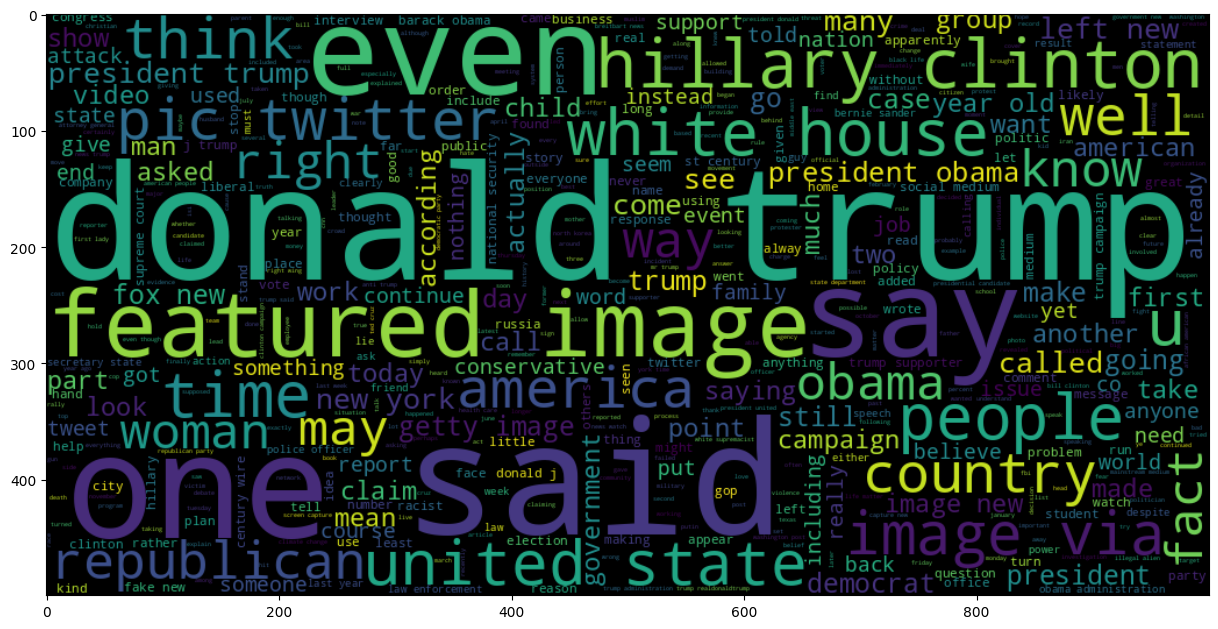

In [33]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

# Modeling

Train Test Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], random_state=0)

Tokenizing

Tokenizing Text -> Repsesenting each word by a number

Mapping of orginal word to number is preserved in word_index property of tokenizer

In [35]:
max_features = 10000
maxlen = 300

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [37]:
import tensorflow as tf

In [38]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [39]:
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

# Training LSTM Model

In [40]:
batch_size = 256
epochs = 10
embed_size = 100

In [41]:
model = Sequential()
model.add(Embedding(max_features, output_dim=embed_size, trainable=False))
# LSTM
model.add(LSTM(units=128, return_sequences=True, recurrent_dropout=0.25, dropout=0.25))
model.add(LSTM(units=64, recurrent_dropout=0.1, dropout=0.1))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, batch_size=batch_size, shuffle=True, verbose = 1)

Epoch 1/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.5374 - loss: 0.7024 - val_accuracy: 0.5384 - val_loss: 0.6904
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.5294 - loss: 0.6918 - val_accuracy: 0.5391 - val_loss: 0.6898
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.5377 - loss: 0.6893 - val_accuracy: 0.6095 - val_loss: 0.6477
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.6000 - loss: 0.6358 - val_accuracy: 0.4798 - val_loss: 0.6938
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 236s 3s/step - accuracy: 0.5182 - loss: 0.6885 - val_accuracy: 0.5202 - val_loss: 0.6420
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.6917 - loss: 0.5630 - val_accuracy: 0.7897 - val_loss: 0.4337
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - accuracy: 0.8022 - loss: 0.4163 - val_accuracy: 0.8082 - val_loss: 0.3946
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 245s 3s/step - accuracy: 0.8273 - loss: 0.3841 - val_accuracy: 0.8657 - v

In [44]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

1053/1053 ━━━━━━━━━━━━━━━━━━━━ 101s 96ms/step - accuracy: 0.8810 - loss: 0.2637
Accuracy of the model on Training Data is -  87.88940906524658 %
351/351 ━━━━━━━━━━━━━━━━━━━━ 34s 96ms/step - accuracy: 0.8759 - loss: 0.2765
Accuracy of the model on Testing Data is -  87.56347298622131 %


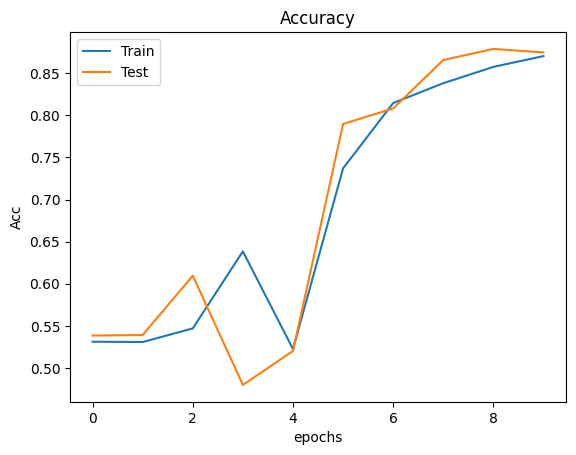

In [45]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

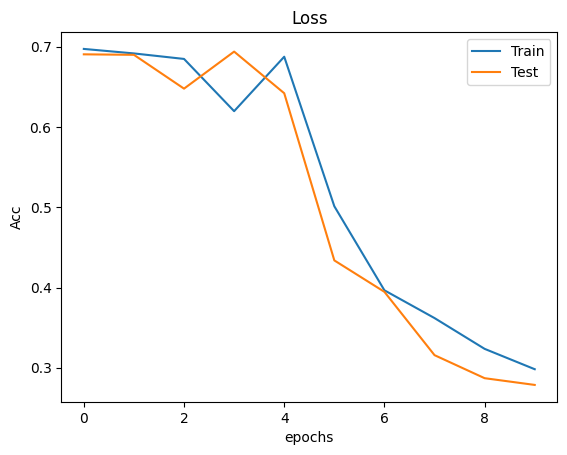

In [46]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [47]:
model.save("model.h5")

##Detection Using BERT

In [48]:
! pip install transformers

In [49]:
final_data= pd.concat([fake_data,real_data])

In [50]:
final_data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [51]:
final_data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [52]:
final_data.drop(["subject","date"], axis=1)

,title,text,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [53]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split


In [54]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_length = 128

In [55]:
tokenized_texts = [tokenizer.tokenize(text) for text in data['text']]

In [56]:
input_ids = [tokenizer.convert_tokens_to_ids(tokens) for tokens in tokenized_texts]

# Pad input sequences
input_ids = torch.tensor([ids[:max_length] + [0]*(max_length-len(ids)) for ids in input_ids])

# Create attention masks
attention_masks = torch.where(input_ids != 0, torch.tensor(1), torch.tensor(0))

# Convert target to tensor
labels = torch.tensor(data['target'].values)

In [57]:
train_inputs, val_inputs, train_labels, val_labels = train_test_split(input_ids, labels, test_size=0.1, random_state=42)
train_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids, test_size=0.1, random_state=42)

Create DataLoaders: Create DataLoader objects to load the data in batches

In [58]:
batch_size = 32

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

Initialize BERT model: Initialize a BERT model for sequence classification

In [59]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [60]:
optimizer = AdamW(model.parameters(), lr=0.002)

from transformers import get_linear_schedule_with_warmup

epochs = 1
total_steps = len(train_loader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

In [61]:
device = torch.device('cpu')

model.train()
for epoch in range(epochs):
    for batch in train_loader:
        batch = tuple(t.to(device) for t in batch)
        inputs, masks, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=masks, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()


KeyboardInterrupt: 

In [ ]:
model.eval()
val_accuracy = 0
with torch.no_grad():
    for batch in val_loader:
        batch = tuple(t.to(device) for t in batch)
        inputs, masks, labels = batch
        outputs = model(inputs, attention_mask=masks)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        val_accuracy += torch.sum(preds == labels).item()

val_accuracy /= len(val_inputs)
print("Validation Accuracy:", val_accuracy)


## SVM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import os


from bs4 import BeautifulSoup
from textblob import TextBlob

In [ ]:
true= pd.read_csv('/content/drive/MyDrive/fakenews/data/true.csv')
fake = pd.read_csv('/content/drive/MyDrive/fakenews/data/fake.csv')

In [ ]:
true['target'] = 0

In [ ]:
fake['target'] = 1

In [ ]:
df = [true, fake]

# Ignore index
data = pd.concat(df, ignore_index=True)

In [ ]:
# words count
def words_count(df):
    length = len(str(df).split())
    return length

# characters count

def char_count(df):
    string = df.split()
    x = ''.join(string)
    return len(x)

# hashtags count

def hashtag_count(df):
    hashtag = len([t for t in df.split() if t.startswith('#')])
    return hashtag

# email count

def email_count(df):
    email = len([t for t in df.split() if t.startswith('@')])
    return email

# digits count

def digits_count(df):
    digits = re.findall(r'[0-9]+', df)
    return digits
def get_features(df):
    df['words_count'] = df['text'].apply(lambda x: words_count(x))
    df['char_count'] = df['text'].apply(lambda x: char_count(x))
    df['hashtags_count'] = df['text'].apply(lambda x: hashtag_count(x))
    df['email_counts'] = df['text'].apply(lambda x: email_count(x))
    df['digits_count'] = df['text'].apply(lambda x: digits_count(x))

    return df

In [ ]:
data = get_features(data)

In [ ]:
data.head()

,title,text,subject,date,target,words_count,char_count,hashtags_count,email_counts,digits_count
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,749,3907,0,0,"[2018, 7, 10, 11, 1, 5, 10, 20, 1, 5, 30, 2018..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,624,3453,0,0,"[1, 21, 1, 8, 1, 1, 2017, 1, 2018]"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,457,2324,0,0,"[2016, 2018]"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,376,2085,0,0,"[2016, 30, 2016]"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,852,4341,0,0,"[2, 2015, 11, 5, 46, 0, 86, 1, 175, 90, 62, 3,..."


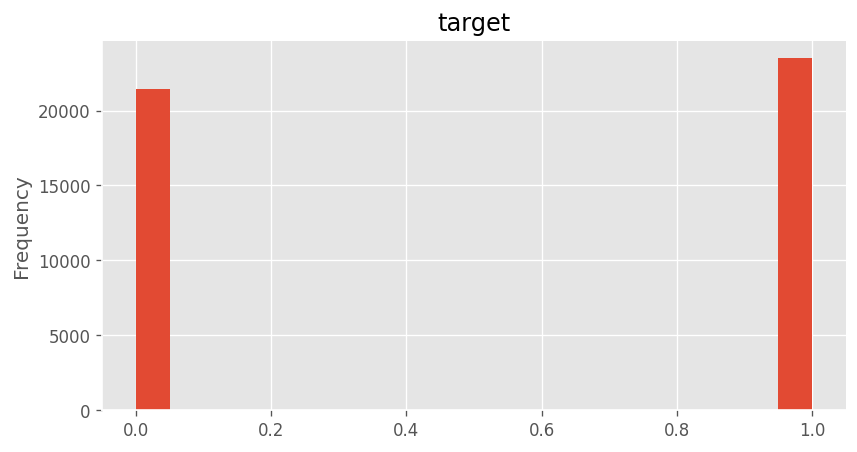

In [ ]:
# @title target

from matplotlib import pyplot as plt
data['target'].plot(kind='hist', bins=20, title='target')
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'Correlation between number of words and target')

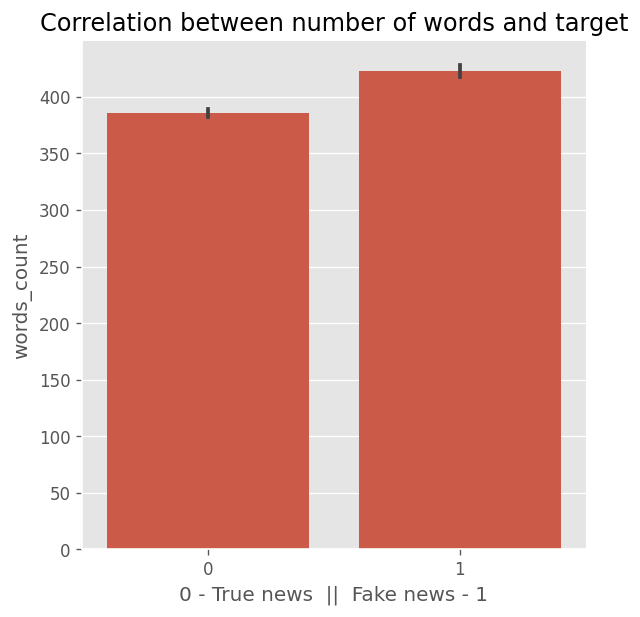

In [ ]:
sns.catplot(x='target', y='words_count', kind='bar', data=data)
plt.xlabel('0 - True news  ||  Fake news - 1')
plt.title('Correlation between number of words and target')

In [ ]:
sns.catplot(x='target', y='words_count', kind='bar', data=data)
plt.xlabel('0 - True news  ||  Fake news - 1')
plt.title('Correlation between number of words and target')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
tfidf = TfidfVectorizer(lowercase=False, stop_words='english')

In [ ]:
text = data['text']
X = tfidf.fit_transform(text)
y = data['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 777)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
clf_svc = LinearSVC()
clf_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
clf_svc.score(X_test, y_test)